In [1]:
import numpy as np
import matplotlib.pyplot as plt

For AND operator


[]

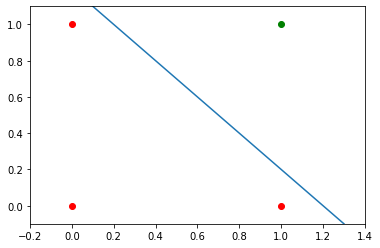

In [2]:
print("For AND operator")
fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.4
X = np.arange(xmin, xmax, 0.1)
ax.scatter(0, 0, color="r")
ax.scatter(0, 1, color="r")
ax.scatter(1, 0, color="r")
ax.scatter(1, 1, color="g")
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
m, c = -1, 1.2
ax.plot(X, m * X + c )
plt.plot()

In [3]:
y = ([0,0],[0,1],[1,0],[1,1])
for item in y:
    print(item)

[0, 0]
[0, 1]
[1, 0]
[1, 1]


In [4]:
def thresholdFunc(output):
    if output < 0:
        output = 0
    if output > 1:
        output = 1
    return output

In [5]:
w1 = 1
w2 = 1
b = -1
for item in y:
    x1 = item[0]
    x2 = item[1]
    output = w1*x1+w2*x2+b
    output = thresholdFunc(output)
    print(str(item)+" "+str(output))

[0, 0] 0
[0, 1] 0
[1, 0] 0
[1, 1] 1


In [6]:
w1 = 2
w2 = 2
b = -1
for item in y:
    x1 = item[0]
    x2 = item[1]
    output = w1*x1+w2*x2+b
    output = thresholdFunc(output)
    print(str(item)+" "+str(output))

[0, 0] 0
[0, 1] 1
[1, 0] 1
[1, 1] 1


In [7]:
def sigmoid (x):
    return 1/(1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

In [8]:
def neuralNetworkModel(inputs,expected_output):
    epochs = 10000
    lr = 0.1
    inputLayerNeurons, hiddenLayerNeurons, outputLayerNeurons = 2,2,1

    #Random weights and bias initialization
    hidden_weights = np.random.uniform(size=(inputLayerNeurons,hiddenLayerNeurons))
    hidden_bias =np.random.uniform(size=(1,hiddenLayerNeurons))
    output_weights = np.random.uniform(size=(hiddenLayerNeurons,outputLayerNeurons))
    output_bias = np.random.uniform(size=(1,outputLayerNeurons))

   

    #Training algorithm
    for _ in range(epochs):
        #Forward Propagation
        hidden_layer_activation = np.dot(inputs,hidden_weights)
        hidden_layer_activation += hidden_bias
        hidden_layer_output = sigmoid(hidden_layer_activation)

        output_layer_activation = np.dot(hidden_layer_output,output_weights)
        output_layer_activation += output_bias
        predicted_output = sigmoid(output_layer_activation)

        #Backpropagation
        error = expected_output - predicted_output
        d_predicted_output = error * sigmoid_derivative(predicted_output)

        error_hidden_layer = d_predicted_output.dot(output_weights.T)
        d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

        #Updating Weights and Biases
        output_weights += hidden_layer_output.T.dot(d_predicted_output) * lr
        output_bias += np.sum(d_predicted_output,axis=0,keepdims=True) * lr
        hidden_weights += inputs.T.dot(d_hidden_layer) * lr
        hidden_bias += np.sum(d_hidden_layer,axis=0,keepdims=True) * lr

 

In [9]:

inputs = np.array([[0,0],[0,1],[1,0],[1,1]])
expected_output = np.array([[0],[0],[0],[1]])

print("\nAND operator")
neuralNetworkModel(inputs,expected_output)

inputs = np.array([[0,0],[0,1],[1,0],[1,1]])
expected_output = np.array([[0],[1],[1],[1]])


neuralNetworkModel(inputs,expected_output)



AND operator
Initial hidden weights: [0.53695651 0.84081594] [0.51585307 0.5454667 ]
Initial hidden biases: [0.63898646 0.01438379]
Initial output weights: [0.81652304] [0.29081969]
Initial output biases: [0.53458546]
Final hidden weights: [2.10431866 3.33089761] [2.14393575 3.30300166]
Final hidden bias: [-3.15426283 -4.96031802]
Final output weights: [3.85307279] [6.86476962]
Final output bias: [-5.48802635]

Output from neural network after 10,000 epochs: [0.00505415] [0.03355943] [0.03344307] [0.96003084]

OR operator
Initial hidden weights: [0.95545885 0.64830108] [0.81520241 0.38498877]
Initial hidden biases: [0.25731901 0.53057038]
Initial output weights: [0.92523667] [0.93123645]
Initial output biases: [0.07307403]
Final hidden weights: [3.92882414 2.91539364] [3.95696876 2.87768286]
Final hidden bias: [-2.13410956 -1.63813735]
Final output weights: [5.99403036] [3.88519067]
Final output bias: [-4.41259517]

Output from neural network after 10,000 epochs: [0.04124856] [0.97725

In [10]:
def relu(x) :
    return max(x, 0)

def der_relu(x):
    if x <= 0 :
        return 0
    if x > 0 :
        return 1

def sigmoids(z):
    s = 1 / (1 * np.exp(-z))
    ds = s*(1-s)
    return s, ds

def tanh(x):
    t=(np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
    dt=1-t**2
    return t,dt


In [11]:
x= np.arange(-4,4,0.01)


C:\Users\Jeena\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


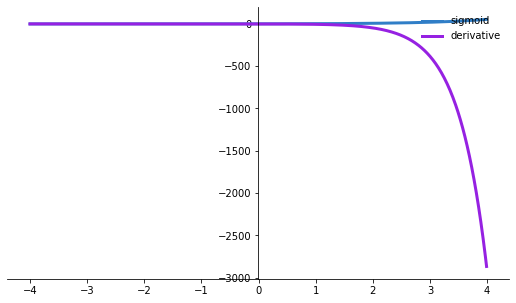

In [12]:
# Setup centered axes
fig, ax = plt.subplots(figsize=(9, 5))
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
# Create and show plot
ax.plot(x,sigmoids(x)[0], color="#307EC7", linewidth=3, label="sigmoid")
ax.plot(x,sigmoids(x)[1], color="#9621E2", linewidth=3, label="derivative")
ax.legend(loc="upper right", frameon=False)
fig.show()

C:\Users\Jeena\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


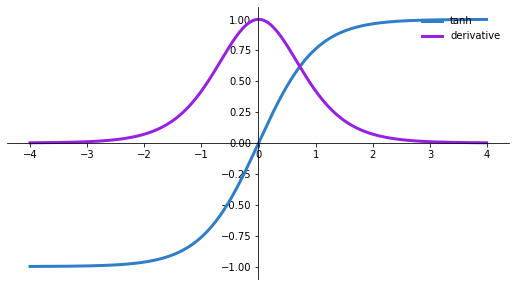

In [13]:
# Setup centered axes
fig, ax = plt.subplots(figsize=(9, 5))
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
# Create and show plot
ax.plot(x,tanh(x)[0], color="#307EC7", linewidth=3, label="tanh")
ax.plot(x,tanh(x)[1], color="#9621E2", linewidth=3, label="derivative")
ax.legend(loc="upper right", frameon=False)
fig.show()

C:\Users\Jeena\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


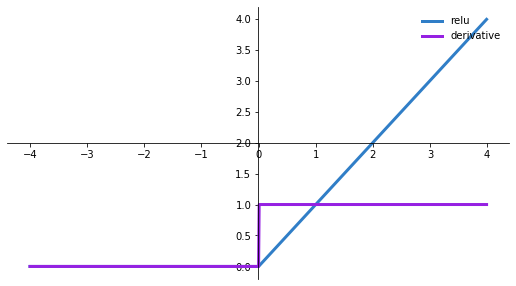

In [14]:

fig, ax = plt.subplots(figsize=(9, 5))
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
# Create and show plot
ax.plot(x,list(map(lambda x: relu(x),x)), color="#307EC7", linewidth=3, label="relu")
ax.plot(x,list(map(lambda x: der_relu(x),x)), color="#9621E2", linewidth=3, label="derivative")
ax.legend(loc="upper right", frameon=False)
fig.show()